In [1]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt


/Users/leetaegeom/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
import tensorflow as tf
tf.random.set_seed(777)
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
df1=pd.read_csv("politics.CSV", encoding='cp949')

In [5]:
df2=pd.read_csv("economy.CSV", encoding='cp949')

In [6]:
df3=pd.read_csv("society.CSV", encoding='cp949')

In [7]:
df4=pd.read_csv("region.CSV", encoding='cp949')

In [8]:
df5=pd.read_csv("sport.CSV", encoding='cp949')

In [9]:
df6=pd.read_csv("science.CSV", encoding='cp949')

In [10]:
df7=pd.read_csv("global.CSV", encoding='cp949')

In [11]:
df8=pd.read_csv("culture.CSV", encoding='cp949')

In [12]:
data_list = []
data_list.append(df1[:10000])
data_list.append(df2[:10000])
data_list.append(df3[:10000])
data_list.append(df4[:10000])
data_list.append(df5[:10000])
data_list.append(df6[:10000])
data_list.append(df7[:10000])
data_list.append(df8[:10000])

In [13]:
data=pd.DataFrame()
for i in data_list:
    data = pd.concat([data,i],ignore_index=True)

In [14]:
data=data[['제목','본문','통합 분류1']]

In [15]:
data.isnull().sum()

제목        0
본문        0
통합 분류1    0
dtype: int64

In [16]:
len(data[data.duplicated()])

9117

In [17]:
data=data.drop_duplicates(ignore_index = True)


In [18]:
data["본문"] = data["본문"].str.replace(pat=r'[^\w]', repl=r' ', regex=True)

In [19]:
data['통합 분류1']=data['통합 분류1'].str.split('>', expand=True).get(0)
data

,제목,본문,통합 분류1
0,홍준표 “전두환 靑파견검사 제안 거절 유혹 안 넘어가”,홍준표 국민의힘 의원이 전두환 전 대통령과 관련해 제 두 번째 고향이 합천인데 전...,정치
1,"외신 ""그래미, 방탄소년단 퇴짜...단 1개 부문만 후보 지명""",BTS가 미국 최고 권위 음악상인 그래미상 후보에 2년 연속 올랐지만 외신들은 최...,정치
2,김종인 “일상으로 돌아간다” 윤석열 “그 양반 묻지 말라”,앵커 김종인 전 비대위원장이 이른바 원톱 을 맡는 국민의힘의 선대위 구성은...,정치
3,"차별화 시동 건 이재명 “부동산 정책, 시장 따라갈 것”",앵커 정치권 소식입니다 새로운 민주당을 만들겠다고 한 이재명 후보 부...,정치
4,"BTS, 그래미상 2년 연속 후보 ‘올해의 레코드’ 후보는 못 올라",앵커 그룹 방탄소년단이 미국 대중음악계 최고 권위의 그래미상 후보로 2년 연...,정치
...,...,...,...
70878,천안예술의전당 '11시 콘서트' 30일 플루티스트 조성현 무대,예프게니 오네긴과 도플러의 헝가리 전원환상곡 등 연주 충남 천안문화재단 오는 30일...,문화
70879,5000만 년 전 개미 몸속에 기생한 신종 동충하초 발견,몇천 년 전 개미 몸속에 기생한 버섯의 일종인 동충하초가 호박 화석 안에서 발견됐다...,문화
70880,진천 상산자석벼루의 현 주소와 과제,중부매일 송창희 기자 조선시대 최고의 벼루로 명성을 날린 진천 상산자석벼루 常...,문화
70881,"멜로망스 정동환, 피아노 연주 앨범 발매 기념 이벤트 진행",멜로망스 멤버 정동환의 첫 피아노 연주 앨범 발매 기념 이벤트가 진행된다 정동환은...,문화


In [20]:
okt = Okt() #okt사용

def okt_morphs(doc):
    tmp=okt.morphs(doc,stem=True)
    return tmp

def okt_nouns(doc):
    tmp=okt.nouns(doc)
    return tmp

def okt_pos(doc):
    tmp=[]
    for i,j in okt.pos(doc):
        if j in ['Noun','Adjective']:
            tmp.append(i)
    return tmp

In [21]:
data['본문정리morphs']=data['본문'].apply(okt_morphs)
data['본문정리nouns']=data['본문'].apply(okt_nouns)
data['본문정리pos']=data['본문'].apply(okt_pos)

In [22]:
categories=np.unique(data['통합 분류1']) #카테고리 안겹치게 한종류씩
categories

array(['IT_과학', '경제', '국제', '문화', '사회', '스포츠', '정치', '지역'], dtype=object)

In [23]:
category={}
for i in categories:
    category[i]=len(data[data['통합 분류1']==i])

In [24]:
category #카테고리별 데이터셋 수

{'IT_과학': 6370,
 '경제': 10244,
 '국제': 7563,
 '문화': 9862,
 '사회': 10126,
 '스포츠': 9221,
 '정치': 8738,
 '지역': 8759}

In [25]:
lcategories=list(categories)
def category(ct):
    return lcategories.index(ct)
data['숫자카테고리']=data['통합 분류1'].apply(category)
data['숫자카테고리']

0        6
1        6
2        6
3        6
4        6
        ..
70878    3
70879    3
70880    3
70881    3
70882    4
Name: 숫자카테고리, Length: 70883, dtype: int64

In [26]:
data=data.sample(frac=1).reset_index(drop=True)

In [27]:
data.head()

,제목,본문,통합 분류1,본문정리morphs,본문정리nouns,본문정리pos,숫자카테고리
0,한국학중앙연구원 새 이사장 유홍준 교수,한국학중앙연구원 원장 안병우 은 지난 25일 이사회를 열고 새 이사장으로 유홍준 7...,문화,"[한, 국학, 중앙, 연구원, 원장, 안병, 우, 은, 지난, 25일, 이사회, 를...","[국학, 중앙, 연구원, 원장, 안병, 은, 지난, 이사회, 새, 이사장, 유홍준,...","[국학, 중앙, 연구원, 원장, 안병, 은, 지난, 이사회, 새, 이사장, 유홍준,...",3
1,“통일 후 대만인 연봉 86만 원 올리기는 식은 죽 먹기”...中 장밋빛 미래 제시,중국 당국이 통일 후 대만인의 평균 연봉을 2만 대만 달러 약 86만 원 이상 인...,정치,"[중국, 당국, 이, 통일, 후, 대만인, 의, 평균, 연봉, 을, 2만, 대만, ...","[중국, 당국, 통일, 후, 대만인, 평균, 연봉, 대만, 달러, 약, 원, 이상,...","[중국, 당국, 통일, 후, 대만인, 평균, 연봉, 대만, 달러, 약, 원, 이상,...",6
2,올 수능 작년보다 어려웠다,문 이과 첫 통합으로 치러진 2022학년도 대학수학능력시험 수능 은 전반적으로 지난...,사회,"[문, 이과, 첫, 통합, 으로, 치러지다, 2022, 학년, 도, 대학, 수학, ...","[문, 이과, 첫, 통합, 학년, 대학, 수학, 능력, 시험, 수능, 은, 전반, ...","[문, 이과, 첫, 통합, 학년, 대학, 수학, 능력, 시험, 수능, 은, 전반, ...",4
3,‘10대 최강자’ 김주형 “이루고 싶은 것 다 이뤘다 다시 美 도전”,헤럴드경제 파주 조범자 기자 이루고 싶은 목표를 다 이뤘다 다시 준비 잘 ...,스포츠,"[헤럴드경제, 파주, 조, 범자, 기자, 이루다, 싶다, 목표, 를, 다, 이루다,...","[헤럴드경제, 파주, 범자, 기자, 목표, 다시, 준비, 미국, 무대, 김주형, 이...","[헤럴드경제, 파주, 범자, 기자, 목표, 다시, 준비, 미국, 무대, 김주형, 이...",5
4,"축구 국가대표 황희찬, 모교 포철고에 3000만원 기부",축구 국가대표 공격수 황희찬 선수가 15일 모교인 경북 포항제철고교 이하 포철고 에...,스포츠,"[축구, 국가대표, 공격수, 황희, 찬, 선수, 가, 15일, 모교, 인, 경북, ...","[축구, 국가대표, 공격수, 황희, 찬, 선수, 모교, 경북, 포항, 제철, 고교,...","[축구, 국가대표, 공격수, 황희, 찬, 선수, 모교, 경북, 포항, 제철, 고교,...",5


In [28]:
data.to_csv('okt.csv')

In [65]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(data['본문정리morphs'], data['숫자카테고리'], test_size=0.2, random_state=2021)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2021)



In [66]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train) #빈도수가 높은애로 인덱스 부여
len(tokenizer.word_index)

61581

In [67]:
tokenizer.word_index

{'하다': 1,
 '을': 2,
 '이': 3,
 '에': 4,
 '의': 5,
 '를': 6,
 '은': 7,
 '가': 8,
 '에서': 9,
 '는': 10,
 '한': 11,
 '으로': 12,
 '있다': 13,
 '로': 14,
 '과': 15,
 '되다': 16,
 '들': 17,
 '이다': 18,
 '등': 19,
 '와': 20,
 '전': 21,
 '인': 22,
 '기자': 23,
 '것': 24,
 '적': 25,
 '1': 26,
 '돼다': 27,
 '밝히다': 28,
 '하고': 29,
 '고': 30,
 '지난': 31,
 '도': 32,
 '2': 33,
 '한국': 34,
 '다': 35,
 '수': 36,
 '따르다': 37,
 '명': 38,
 '후보': 39,
 '위': 40,
 '코로나': 41,
 '제': 42,
 '열리다': 43,
 '미국': 44,
 '가다': 45,
 '늘다': 46,
 '3': 47,
 '날': 48,
 '19': 49,
 '까지': 50,
 '서울': 51,
 '부터': 52,
 '오다': 53,
 '받다': 54,
 '원': 55,
 '22일': 56,
 '국민': 57,
 '장': 58,
 '씨': 59,
 '23일': 60,
 '대': 61,
 '4': 62,
 '지역': 63,
 '대선': 64,
 '경기': 65,
 '에게': 66,
 '위해': 67,
 '않다': 68,
 '시간': 69,
 '대통령': 70,
 '민주당': 71,
 '개': 72,
 '중': 73,
 '이번': 74,
 '대표': 75,
 '중국': 76,
 '보다': 77,
 '사업': 78,
 '사진': 79,
 '5': 80,
 '오후': 81,
 '진행': 82,
 '통해': 83,
 '경제': 84,
 '대한': 85,
 '현지': 86,
 '자': 87,
 '대다': 88,
 '대회': 89,
 '19일': 90,
 '6': 91,
 '지': 92,
 '2021': 93,
 '힘': 94,
 '올해'

In [68]:
threshold=2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합


# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 61581
등장 빈도가 1번 이하인 희귀 단어의 수: 20443
단어 집합에서 희귀 단어의 비율: 33.19692762378006
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.6404737557082776


In [69]:
#빈도가 1회인 단어들은 중요하지않아서 제외
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 41140


In [70]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(x_train) #빈도수가 높은애로 인덱스 부여


In [71]:
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_val_sequences = tokenizer.texts_to_sequences(x_val)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

In [72]:
max_len = max(len(i) for i in x_train_sequences )
print(max_len) #시퀀스 최대길이

97


In [73]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))
below_threshold_len(max_len, x_train_sequences)

전체 샘플 중 길이가 97 이하인 샘플의 비율: 100.0


In [74]:
x_train_pad=pad_sequences(x_train_sequences, maxlen=max_len, truncating='post', padding='post')#패딩
x_val_pad=pad_sequences(x_val_sequences, maxlen=max_len, truncating='post', padding='post')#패딩
x_test_pad=pad_sequences(x_test_sequences, maxlen=max_len, truncating='post', padding='post')#패딩
#truncating='post', padding='post' 앞에꺼는 길이가 안맞을때 뒤에 0으로 채운다는거, 뒤에꺼는 넘어갈때 뒤에 자른다는거



In [75]:
y_train=tf.keras.utils.to_categorical(y_train)

y_val=tf.keras.utils.to_categorical(y_val)

y_test=tf.keras.utils.to_categorical(y_test)


In [76]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout

embedding_dim=128
hidden_units=128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(LSTM(hidden_units))
model.add(Dropout(0.3))  
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [78]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
best=ModelCheckpoint('best_model', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

history=model.fit(
    x_train_pad,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val_pad, y_val), 
    callbacks=[early_stop,best]
    
)

Epoch 1/100
355/355 [==============================] - ETA: 0s - loss: 1.6778 - accuracy: 0.3252
Epoch 00001: val_loss improved from inf to 1.37731, saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
355/355 [==============================] - 79s 223ms/step - loss: 1.6778 - accuracy: 0.3252 - val_loss: 1.3773 - val_accuracy: 0.4671
Epoch 2/100
355/355 [==============================] - ETA: 0s - loss: 1.5156 - accuracy: 0.4171
Epoch 00002: val_loss did not improve from 1.37731
355/355 [==============================] - 75s 212ms/step - loss: 1.5156 - accuracy: 0.4171 - val_loss: 1.5842 - val_accuracy: 0.3663
Epoch 3/100
355/355 [==============================] - ETA: 0s - loss: 1.3888 - accuracy: 0.4774
Epoch 00003: val_loss improved from 1.37731 to 1.36809, saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
355/355 [==============================] - 77s 216ms/step - loss: 1.3888 - accuracy: 0.4774 - val_loss: 1.3681 - val_accur

In [79]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 97, 128)           5265920   
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 1032      
Total params: 5,398,536
Trainable params: 5,398,536
Non-trainable params: 0
_________________________________________________________________


In [80]:
from tensorflow.keras.models import load_model
loaded_model = load_model('best_model')
print('\n테스트 정확도 : %.4f'%(loaded_model.evaluate(x_test_pad,y_test)[1]))

444/444 [==============================] - 10s 22ms/step - loss: 0.8846 - accuracy: 0.7492

테스트 정확도 : 0.7492


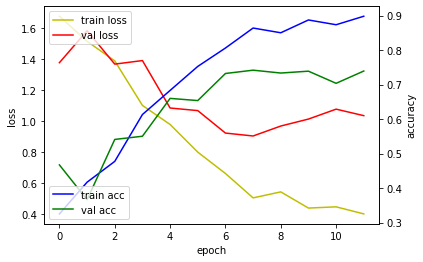

In [81]:
import matplotlib.pyplot as plt

fig, loss_ax=plt.subplots()

acc_ax=loss_ax.twinx()

loss_ax.plot(history.history['loss'],'y',label='train loss')
loss_ax.plot(history.history['val_loss'],'r',label='val loss')

acc_ax.plot(history.history['accuracy'],'b',label='train acc')
acc_ax.plot(history.history['val_accuracy'],'g',label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()